<a href="https://colab.research.google.com/github/Tyton25/Event_Analysis/blob/main/mass_gv_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install us
!pip install geonamescache
!pip install folium

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.4 MB/s eta 0:00:00
  Created wheel for us: filename=us-3.1.1-py3-none-any.whl size=12545 sha256=11968aa430cc7e77e0ee10d4b5dd5b5179f87e8944a35c1129370e5df2cf4d1d
  Stored in directory: /root/.cache/pip/wheels/da/f9/64/9669135a7ce533faf78e3b32259c505f964f03b069be6844f8
Successfully built us
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 26.9 MB/s eta 0:00:00


In [ ]:
# import us
import io
import csv
import folium
import requests
import geonamescache
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from csv import DictReader
from tabulate import tabulate

In [ ]:
# states = us.states.STATES
# states

In [ ]:
# states = [s.name for s in us.states.STATES]
# states

In [ ]:
gc = geonamescache.GeonamesCache()
us_states = gc.get_us_states()
us_states.keys()

dict_keys(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])

In [ ]:
state_abbrs = us_states.keys()
states = []
for abbr in state_abbrs:
  states.append(us_states[abbr]['name'])
states

['Alaska',
 'Alabama',
 'Arkansas',
 'Arizona',
 'California',
 'Colorado',
 'Connecticut',
 'District of Columbia',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Iowa',
 'Idaho',
 'Illinois',
 'Indiana',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Massachusetts',
 'Maryland',
 'Maine',
 'Michigan',
 'Minnesota',
 'Missouri',
 'Mississippi',
 'Montana',
 'North Carolina',
 'North Dakota',
 'Nebraska',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'Nevada',
 'New York',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Virginia',
 'Vermont',
 'Washington',
 'Wisconsin',
 'West Virginia',
 'Wyoming']

In [ ]:
state_abbrs = us_states.keys()
states_dict = {}
for abbr in state_abbrs:
  states_dict[abbr] = us_states[abbr]['name']
states_dict

{'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming

In [ ]:
cities_columns = ['geoname_id', 'name', 'asciiname', 'alternatemanes', 'latitude', 'latitude',
                     'feature_class', 'feature_code', 'country_code', 'cc2', 'admin1_code', 'admin2_code',
                     'admin3_code', 'admin4_code', 'population', 'elevation', 'elem', 'timezone', 'modification_date']

In [ ]:
# File downloaded from https://download.geonames.org/export/dump/
# cities_df = pd.read_csv("/content/us_gazeteer.txt", sep="\t", header=None)
# cities_df

In [ ]:
# cities_df.columns = cities_columns
# cities_df

In [ ]:
# cities_df.info()

In [ ]:
# us_cities = cities_df['name'].values
# len(us_cities)

In [ ]:
# cities_list = set(us_cities)

In [ ]:
# len(cities_list)

In [ ]:
# 'Bladensburg' in cities_list

In [164]:
# CSV_URL = 'https://raw.githubusercontent.com/Tyton25/Event_Analysis/main/gv_20231224.csv'
CSV_URL = 'https://raw.githubusercontent.com/Tyton25/Event_Analysis/main/gv_all_time.csv'
CSV_INPUT_FILE = "/content/sample_data/gv_input.csv"

In [162]:
download = requests.get(CSV_URL)
with open(CSV_INPUT_FILE, 'w') as f:
  f.write(download.content.decode('utf-8'))

In [166]:
# Download, read, and transform into a pandas dataframe
download = requests.get(CSV_URL).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))
df.head()

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations
0,2786002,"December 24, 2023",Florida,Orlando (Lockhart),2800 block of Sudman Way,1,4,0,0,0,NaN
1,2786038,"December 24, 2023",Texas,Houston,5828 Martin Luther King Blvd,1,4,0,0,0,NaN
2,2786444,"December 24, 2023",Colorado,Colorado Springs,750 Citadel Dr E,1,3,0,0,0,NaN
3,2785646,"December 23, 2023",Maryland,Baltimore,1808 Woodlawn Dr,1,4,0,0,0,NaN
4,2786253,"December 23, 2023",Texas,Fort Worth,9325 Cynthia Ct,1,4,0,0,0,NaN


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Incident ID        2000 non-null   int64  
 1   Incident Date      2000 non-null   object 
 2   State              2000 non-null   object 
 3   City Or County     2000 non-null   object 
 4   Address            1989 non-null   object 
 5   Victims Killed     2000 non-null   int64  
 6   Victims Injured    2000 non-null   int64  
 7   Suspects Killed    2000 non-null   int64  
 8   Suspects Injured   2000 non-null   int64  
 9   Suspects Arrested  2000 non-null   int64  
 10  Operations         0 non-null      float64
dtypes: float64(1), int64(6), object(4)
memory usage: 172.0+ KB


In [168]:
df.describe()

,Incident ID,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,0.0
mean,2.338954e+06,1.022000,4.077500,0.057000,0.055000,0.581000,NaN
std,2.531356e+05,1.428473,2.378933,0.238284,0.294989,1.055934,NaN
min,1.876231e+06,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2.112163e+06,0.000000,3.000000,0.000000,0.000000,0.000000,NaN
50%,2.345277e+06,1.000000,4.000000,0.000000,0.000000,0.000000,NaN
75%,2.569731e+06,1.000000,5.000000,0.000000,0.000000,1.000000,NaN
max,2.786444e+06,21.000000,32.000000,2.000000,5.000000,11.000000,NaN


In [169]:
df.drop(columns=['Operations'], inplace=True)
df

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
0,2786002,"December 24, 2023",Florida,Orlando (Lockhart),2800 block of Sudman Way,1,4,0,0,0
1,2786038,"December 24, 2023",Texas,Houston,5828 Martin Luther King Blvd,1,4,0,0,0
2,2786444,"December 24, 2023",Colorado,Colorado Springs,750 Citadel Dr E,1,3,0,0,0
3,2785646,"December 23, 2023",Maryland,Baltimore,1808 Woodlawn Dr,1,4,0,0,0
4,2786253,"December 23, 2023",Texas,Fort Worth,9325 Cynthia Ct,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1995,1882214,"December 20, 2020",Connecticut,Bridgeport,456 Connecticut Ave,2,2,0,0,0
1996,1881213,"December 19, 2020",Illinois,Chicago,8936 S Cottage Grove Ave,0,6,0,0,0
1997,1876727,"December 13, 2020",West Virginia,Elkview,1384 Cemetery Hill Dr,4,0,0,0,1
1998,1877043,"December 12, 2020",California,San Bernardino,900 block of N Sierra Way,1,3,0,0,0


In [170]:
# Rename Columns
def reformat_columns(my_columns):
    formatted_columns = []
    for col in my_columns:
        num_sub = col.replace('# ', '')
        new_col = num_sub.replace('-', '_').replace(' ', '_')
        formatted_columns.append(new_col)

    return formatted_columns

In [171]:
columns = reformat_columns(df.columns)
columns

['Incident_ID',
 'Incident_Date',
 'State',
 'City_Or_County',
 'Address',
 'Victims_Killed',
 'Victims_Injured',
 'Suspects_Killed',
 'Suspects_Injured',
 'Suspects_Arrested']

In [172]:
df.columns = columns
df

,Incident_ID,Incident_Date,State,City_Or_County,Address,Victims_Killed,Victims_Injured,Suspects_Killed,Suspects_Injured,Suspects_Arrested
0,2786002,"December 24, 2023",Florida,Orlando (Lockhart),2800 block of Sudman Way,1,4,0,0,0
1,2786038,"December 24, 2023",Texas,Houston,5828 Martin Luther King Blvd,1,4,0,0,0
2,2786444,"December 24, 2023",Colorado,Colorado Springs,750 Citadel Dr E,1,3,0,0,0
3,2785646,"December 23, 2023",Maryland,Baltimore,1808 Woodlawn Dr,1,4,0,0,0
4,2786253,"December 23, 2023",Texas,Fort Worth,9325 Cynthia Ct,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1995,1882214,"December 20, 2020",Connecticut,Bridgeport,456 Connecticut Ave,2,2,0,0,0
1996,1881213,"December 19, 2020",Illinois,Chicago,8936 S Cottage Grove Ave,0,6,0,0,0
1997,1876727,"December 13, 2020",West Virginia,Elkview,1384 Cemetery Hill Dr,4,0,0,0,1
1998,1877043,"December 12, 2020",California,San Bernardino,900 block of N Sierra Way,1,3,0,0,0


## Breakdown of Deaths/Injuries

### Totals (USA)

In [173]:
# Total victims killed
df['Victims_Killed'].sum()

2044

In [174]:
# Total victims indjured
df['Victims_Injured'].sum()

8155

In [175]:
# Total suspects killed
df['Suspects_Killed'].sum()

114

In [209]:
# Total suspects arrested
df['Suspects_Arrested'].sum()

1162

## City/County Counts

In [230]:
city_counts = df['City_Or_County'].value_counts()
city_counts

Chicago                       139
Philadelphia                   72
Houston                        38
Washington                     36
Baltimore                      36
                             ... 
Cedar City (Enoch)              1
Saint Louis (Moline Acres)      1
Fort Pierce                     1
Sanford                         1
Copiague                        1
Name: City_Or_County, Length: 660, dtype: int64

In [229]:
city_count_df = pd.DataFrame(city_counts)
city_count_df.reset_index(inplace=True)
city_count_df.columns = ['City_Or_County', 'Incidents']
city_count_df

,City_Or_County,Incidents
0,Chicago,139
1,Philadelphia,72
2,Houston,38
3,Washington,36
4,Baltimore,36
...,...,...
655,Cedar City (Enoch),1
656,Saint Louis (Moline Acres),1
657,Fort Pierce,1
658,Sanford,1


In [236]:
trunc_city_count_df = city_count_df[:15]
trunc_city_count_df

,City_Or_County,Incidents
0,Chicago,139
1,Philadelphia,72
2,Houston,38
3,Washington,36
4,Baltimore,36
5,Columbus,29
6,Memphis,27
7,Detroit,27
8,New Orleans,26
9,Cleveland,26


<function matplotlib.pyplot.show(close=None, block=None)>

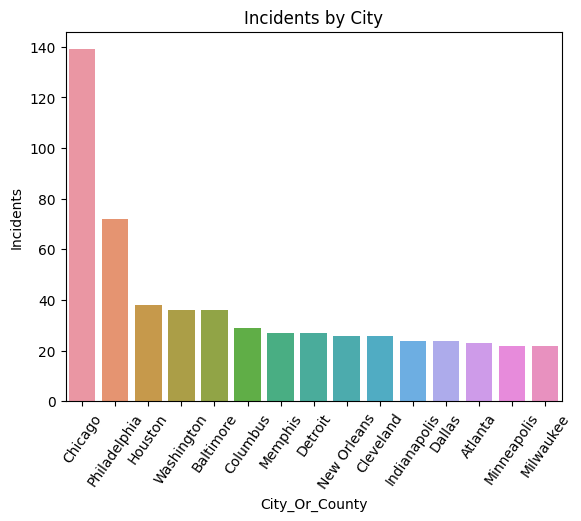

In [237]:
ax = sns.barplot(data=trunc_city_count_df, x=trunc_city_count_df.City_Or_County, y=trunc_city_count_df.Incidents)
ax.tick_params(axis='x', rotation=55)
ax.set_title('Incidents by City')
# ax.set_ylabel('deaths', rotation=45)
plt.show

## Deadly Incidents

In [177]:
deadly_df = df[df['Victims_Killed'] > 0]
deadly_df

,Incident_ID,Incident_Date,State,City_Or_County,Address,Victims_Killed,Victims_Injured,Suspects_Killed,Suspects_Injured,Suspects_Arrested
0,2786002,"December 24, 2023",Florida,Orlando (Lockhart),2800 block of Sudman Way,1,4,0,0,0
1,2786038,"December 24, 2023",Texas,Houston,5828 Martin Luther King Blvd,1,4,0,0,0
2,2786444,"December 24, 2023",Colorado,Colorado Springs,750 Citadel Dr E,1,3,0,0,0
3,2785646,"December 23, 2023",Maryland,Baltimore,1808 Woodlawn Dr,1,4,0,0,0
4,2786253,"December 23, 2023",Texas,Fort Worth,9325 Cynthia Ct,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1994,1885251,"December 22, 2020",Mississippi,Meridian,Jeffrey Acres Rd,4,0,1,0,0
1995,1882214,"December 20, 2020",Connecticut,Bridgeport,456 Connecticut Ave,2,2,0,0,0
1997,1876727,"December 13, 2020",West Virginia,Elkview,1384 Cemetery Hill Dr,4,0,0,0,1
1998,1877043,"December 12, 2020",California,San Bernardino,900 block of N Sierra Way,1,3,0,0,0


In [178]:
deadly_df.value_counts('Victims_Killed')

Victims_Killed
1     627
2     263
3     113
4      67
5      16
6      11
7       5
8       3
10      2
9       1
11      1
18      1
21      1
dtype: int64

In [179]:
deadly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Incident_ID        1111 non-null   int64 
 1   Incident_Date      1111 non-null   object
 2   State              1111 non-null   object
 3   City_Or_County     1111 non-null   object
 4   Address            1109 non-null   object
 5   Victims_Killed     1111 non-null   int64 
 6   Victims_Injured    1111 non-null   int64 
 7   Suspects_Killed    1111 non-null   int64 
 8   Suspects_Injured   1111 non-null   int64 
 9   Suspects_Arrested  1111 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 95.5+ KB


In [180]:
deadly_df.describe()

,Incident_ID,Victims_Killed,Victims_Injured,Suspects_Killed,Suspects_Injured,Suspects_Arrested
count,1.111000e+03,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,2.335080e+06,1.839784,3.502250,0.085509,0.060306,0.700270
std,2.555503e+05,1.472719,2.788287,0.286131,0.259867,1.089338
min,1.876231e+06,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.108002e+06,1.000000,2.000000,0.000000,0.000000,0.000000
50%,2.328374e+06,1.000000,3.000000,0.000000,0.000000,0.000000
75%,2.566378e+06,2.000000,4.000000,0.000000,0.000000,1.000000
max,2.786444e+06,21.000000,32.000000,2.000000,3.000000,6.000000


In [181]:
state_count_df = deadly_df.value_counts('State')
state_count_df

State
Texas                   110
Illinois                102
California               92
Florida                  50
Pennsylvania             48
Georgia                  45
North Carolina           44
Louisiana                43
Ohio                     43
Michigan                 36
Tennessee                35
Maryland                 35
New York                 33
Colorado                 32
Alabama                  31
Indiana                  31
Mississippi              31
South Carolina           29
Missouri                 26
Virginia                 25
District of Columbia     20
Washington               19
Arizona                  17
Arkansas                 16
Wisconsin                15
Minnesota                14
New Jersey               13
Oklahoma                 12
Kentucky                  9
Oregon                    8
Nevada                    7
Massachusetts             5
New Mexico                5
Nebraska                  5
Kansas                    5
Iowa          

In [182]:
# Create df with state & deaths columns
death_df = pd.DataFrame(state_count_df)
death_df.reset_index(inplace=True)
death_df.columns = ['State', 'Incidents']
death_df

,State,Incidents
0,Texas,110
1,Illinois,102
2,California,92
3,Florida,50
4,Pennsylvania,48
5,Georgia,45
6,North Carolina,44
7,Louisiana,43
8,Ohio,43
9,Michigan,36


In [183]:
# Limit top 15
trunc_death_df = death_df[:15]

<function matplotlib.pyplot.show(close=None, block=None)>

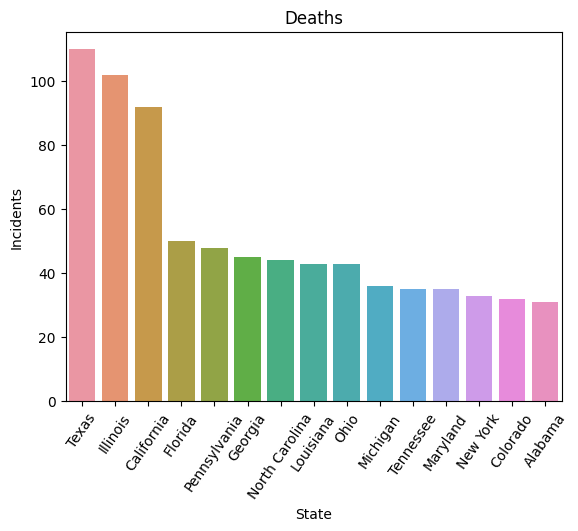

In [184]:
ax = sns.barplot(data = trunc_death_df, x=trunc_death_df.State, y=trunc_death_df.Incidents)
ax.tick_params(axis='x', rotation=55)
ax.set_title('Deaths')
# ax.set_ylabel('deaths', rotation=45)
plt.show

## Suspects at Large

In [185]:
suspect_at_large_df = df.loc[(df['Suspects_Killed'] == 0) &
                             (df['Suspects_Injured'] == 0) &
                             (df['Suspects_Arrested'] == 0)]

suspect_at_large_df.reset_index(inplace=True, drop=True)

In [186]:
suspect_at_large_df

,Incident_ID,Incident_Date,State,City_Or_County,Address,Victims_Killed,Victims_Injured,Suspects_Killed,Suspects_Injured,Suspects_Arrested
0,2786002,"December 24, 2023",Florida,Orlando (Lockhart),2800 block of Sudman Way,1,4,0,0,0
1,2786038,"December 24, 2023",Texas,Houston,5828 Martin Luther King Blvd,1,4,0,0,0
2,2786444,"December 24, 2023",Colorado,Colorado Springs,750 Citadel Dr E,1,3,0,0,0
3,2785646,"December 23, 2023",Maryland,Baltimore,1808 Woodlawn Dr,1,4,0,0,0
4,2786253,"December 23, 2023",Texas,Fort Worth,9325 Cynthia Ct,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1185,1886849,"December 26, 2020",Florida,Miami,NW 61st St and NW 13th Ave,1,3,0,0,0
1186,1886141,"December 24, 2020",Florida,Lakeland,1500 block of Amos Ave,1,4,0,0,0
1187,1882214,"December 20, 2020",Connecticut,Bridgeport,456 Connecticut Ave,2,2,0,0,0
1188,1881213,"December 19, 2020",Illinois,Chicago,8936 S Cottage Grove Ave,0,6,0,0,0


## Texas

In [187]:
texas_df = deadly_df[deadly_df['State'] == 'Texas']
texas_df

,Incident_ID,Incident_Date,State,City_Or_County,Address,Victims_Killed,Victims_Injured,Suspects_Killed,Suspects_Injured,Suspects_Arrested
1,2786038,"December 24, 2023",Texas,Houston,5828 Martin Luther King Blvd,1,4,0,0,0
4,2786253,"December 23, 2023",Texas,Fort Worth,9325 Cynthia Ct,1,4,0,0,0
20,2771255,"December 5, 2023",Texas,Austin,7104 Berkman Dr,6,3,0,0,1
22,2769819,"December 3, 2023",Texas,Dallas,9700 block of Royce Dr,4,1,1,0,0
23,2769728,"December 3, 2023",Texas,Houston,4913 Griggs Rd,1,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1922,1940069,"February 26, 2021",Texas,Houston,8708 Beechnut St,1,5,0,0,0
1968,1897878,"January 9, 2021",Texas,Houston,5828 Martin Luther King Blvd,1,3,0,0,0
1970,1896384,"January 6, 2021",Texas,Livingston,201 Maple Ln,2,2,0,0,3
1977,1893327,"January 3, 2021",Texas,Houston,2900 Travis St,1,3,0,1,1


In [188]:
# Total # of deaths in Texas
texas_df['Victims_Killed'].sum()

231

## Denver

In [189]:
denver_df = df[df['City_Or_County'] == 'Denver']
denver_df

,Incident_ID,Incident_Date,State,City_Or_County,Address,Victims_Killed,Victims_Injured,Suspects_Killed,Suspects_Injured,Suspects_Arrested
59,2747734,"November 5, 2023",Colorado,Denver,5514 E 33rd Ave,2,3,0,2,2
105,2729845,"October 14, 2023",Colorado,Denver,12445 E 39th Ave,3,3,0,0,0
150,2708514,"September 16, 2023",Colorado,Denver,1946 Market St,0,5,0,0,1
357,2623809,"June 13, 2023",Colorado,Denver,2000 block of Market St,0,9,0,1,2
437,2594759,"May 10, 2023",Colorado,Denver,9600 E Girard Ave,1,4,0,0,2
630,2498792,"January 9, 2023",Colorado,Denver,18th St and Blake St,0,4,0,0,0
721,2450360,"November 1, 2022",Colorado,Denver,1400 block of Verbena St,1,5,0,0,1
757,2438121,"October 15, 2022",Colorado,Denver,900 Dakin St,1,7,0,0,0
852,2399670,"August 28, 2022",Colorado,Denver,2731 42nd Ave,1,3,0,0,0
984,2349545,"July 4, 2022",Colorado,Denver,2100 block of W Pacific Pl,1,3,0,0,0


In [190]:
df[df['State'] == 'Idaho']

,Incident_ID,Incident_Date,State,City_Or_County,Address,Victims_Killed,Victims_Injured,Suspects_Killed,Suspects_Injured,Suspects_Arrested
334,2629211,"June 18, 2023",Idaho,Kellogg,525 W Cameron Ave,4,0,0,0,1
1399,2150274,"October 25, 2021",Idaho,Boise,350 N Milwaukee St,2,3,1,0,0


## Incidents by State

In [191]:
df['City_Or_County'].value_counts()

Chicago                       139
Philadelphia                   72
Houston                        38
Washington                     36
Baltimore                      36
                             ... 
Cedar City (Enoch)              1
Saint Louis (Moline Acres)      1
Fort Pierce                     1
Sanford                         1
Copiague                        1
Name: City_Or_County, Length: 660, dtype: int64

In [192]:
incident_states = df['State'].values
incident_states = set(incident_states)
incident_states

{'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin'}

In [193]:
states_set = set(states)
states_set

{'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming'}

In [194]:
incient_free_states = states_set - incident_states
incient_free_states

{'Montana', 'Vermont', 'Wyoming'}

## Choropleth Visualization

### State Incidents Choropleth

In [195]:
state_count_df = df['State'].value_counts().reset_index()
state_count_df.columns = ['State', 'Incidents']
state_count_df

,State,Incidents
0,Illinois,196
1,Texas,172
2,California,144
3,Pennsylvania,104
4,Florida,95
5,Louisiana,92
6,New York,84
7,Ohio,84
8,Georgia,76
9,North Carolina,75


In [196]:
geojson_url = "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
geojson = requests.get(geojson_url).json()

In [197]:
geojson.keys()

dict_keys(['type', 'features'])

In [198]:
geojson['features'][0]

{'type': 'Feature',
 'id': 'AL',
 'properties': {'name': 'Alabama'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-87.359296, 35.00118],
    [-85.606675, 34.984749],
    [-85.431413, 34.124869],
    [-85.184951, 32.859696],
    [-85.069935, 32.580372],
    [-84.960397, 32.421541],
    [-85.004212, 32.322956],
    [-84.889196, 32.262709],
    [-85.058981, 32.13674],
    [-85.053504, 32.01077],
    [-85.141136, 31.840985],
    [-85.042551, 31.539753],
    [-85.113751, 31.27686],
    [-85.004212, 31.003013],
    [-85.497137, 30.997536],
    [-87.600282, 30.997536],
    [-87.633143, 30.86609],
    [-87.408589, 30.674397],
    [-87.446927, 30.510088],
    [-87.37025, 30.427934],
    [-87.518128, 30.280057],
    [-87.655051, 30.247195],
    [-87.90699, 30.411504],
    [-87.934375, 30.657966],
    [-88.011052, 30.685351],
    [-88.10416, 30.499135],
    [-88.137022, 30.318396],
    [-88.394438, 30.367688],
    [-88.471115, 31.895754],
    [-88.241084, 33.796253],
    [-88.098683, 34.8

In [199]:
M = folium.Map(location=[20,10], zoom_start=2)

folium.Choropleth(
    geo_data=geojson,
    data=state_count_df,
    columns=['State', 'Incidents'],
    key_on="properties.name",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Incidents"
).add_to(M)

M

### Deaths Rankings

In [200]:
death_df

,State,Incidents
0,Texas,110
1,Illinois,102
2,California,92
3,Florida,50
4,Pennsylvania,48
5,Georgia,45
6,North Carolina,44
7,Louisiana,43
8,Ohio,43
9,Michigan,36


In [201]:
M = folium.Map(location=[20,10], zoom_start=2)

folium.Choropleth(
    geo_data=geojson,
    data=death_df,
    columns=['State', 'Incidents'],
    key_on="properties.name",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Incidents"
).add_to(M)

M